## 단일집단 t 검정
## stats.ttest_1samp(샘플, 평균)
## 정규성검증
### stats.shapiro

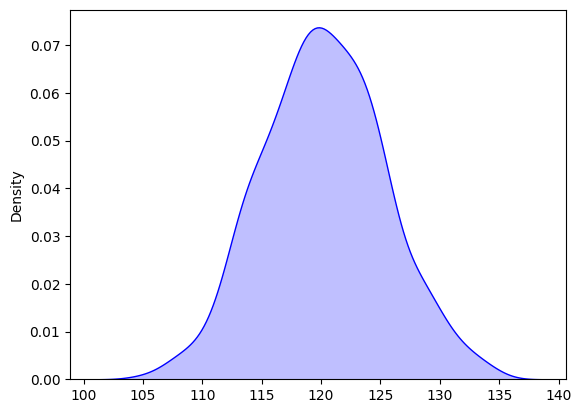

samples are satisfied for normality as group1: 0.78
t = -3.4817068881785325
p = 0.0005419730178156075


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

no_samples = 500 # 샘플수

group = stats.norm(120,5).rvs(no_samples)
sns.kdeplot(data=group,color='blue',fill=True)
plt.show()

pv_of_group = stats.shapiro(group)[1] # p value

if pv_of_group > 0.05:
     print("samples are satisfied for normality as group1: %3.2f" %(pv_of_group))
     
     t,p = stats.ttest_1samp(group,121)
     print("t = " + str(t))
     print("p = " + str(p))
     
# 양측검정 / 단측검정
     
else:
     print("normality test is not satisfied")

## 남자어린이 키
## 1196,1340,1232,1184,1295,1247,1201,1182,1192,1287,1159,1160,1243,1264,1276

In [3]:
data = [1196,1340,1232,1184,1295,1247,1201,1182,1192,1287,1159,1160,1243,1264,1276]
pvV = stats.shapiro(data)[1]

if pvV > 0.05:
     print("samples are satisfied for normality as group1: %3.2f" %(pvV))
     
     t,p = stats.ttest_1samp(data,1220)
     print("t = " + str(t))
     print("p = " + str(p))

     
else:
     print("normality test is not satisfied")

samples are satisfied for normality as group1: 0.49
t = 0.7528774249715862
p = 0.4639961960024156


## 여아 신생아의 몸무게
### 3837,3334,2208,1745,2576,3208,3746,3523,3430,3480,3116,3428,2184,2383,3500,3866,3542,3278
### 평균 2800과 비교하기

In [7]:
## t, p 구하기
data = [3837,3334,2208,1745,2576,3208,3746,3523,3430,3480,3116,3428,2184,2383,3500,3866,3542,3278]
pvV = stats.shapiro(data)[1]
if pvV > 0.05:
     print("samples are satisfied for normality as group1: %3.2f" %(pvV))
     
     t,p = stats.ttest_1samp(data,2800)
     print("t = " + str(t))
     print("p = " + str(p))

     
else:
     print("normality test is not satisfied")

normality test is not satisfied


---

## 두 모집단의 평균차이 검정

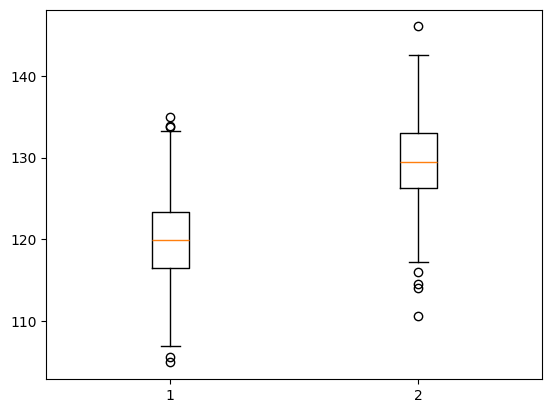

정규성 0.8214322220277206 0.11579631739798046
LeveneResult(statistic=np.float64(0.07736537123568438), pvalue=np.float64(0.7809576595357319))


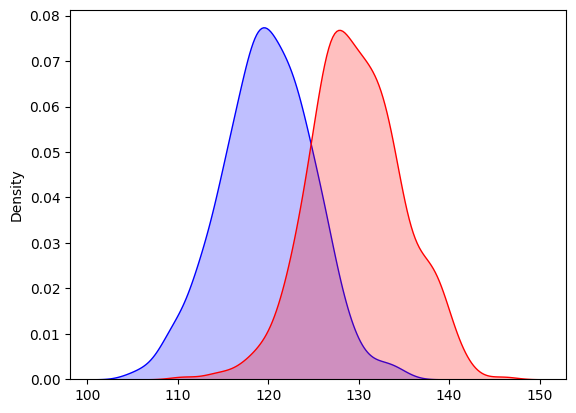

2 samples are satisfied for normality as group1: 0.82, group2: 0.12
t = -30.662659619157253
p = 5.1675601872833885e-146


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats as stats

no_samples1 = 500
no_samples2 = 500

group1 = stats.norm(120,5).rvs(no_samples1)
group2 = stats.norm(130,5).rvs(no_samples2)


plot_data = [group1, group2]
plt.boxplot(plot_data)
plt.show()


pv_of_group1 = stats.shapiro(group1)[1]
pv_of_group2 = stats.shapiro(group2)[1]

print("정규성", pv_of_group1,pv_of_group2)

print(stats.levene(group1,group2)) #  Levene’s Test란? 두 그룹의 **분산이 같은지(등분산인지)**를 확인하는 검정입니다.

sns.kdeplot(data=group1,color='blue',fill=True)
sns.kdeplot(data=group2,color='red',fill=True)
plt.show()

if pv_of_group1 > 0.05 and pv_of_group2 > 0.05:
     print("2 samples are satisfied for normality as group1: %3.2f, group2: %3.2f"\
           %(pv_of_group1,pv_of_group2)) # f string 방식
     pv_of_var = stats.levene(group1,group2)[1] 
     if pv_of_var > 0.05:
           t,p = stats.ttest_ind(group1,group2, alternative='two-sided') # 양측검정
           print("t = " + str(t))
           print("p = " + str(p))

else:
     print("Non-parametric test result")
     print(stats.kruskal(group1, group2))
     print(stats.ks_2samp(group1, group2))

정규성:  0.20224825440795424 0.017984789994719325
LeveneResult(statistic=np.float64(0.07736537123568438), pvalue=np.float64(0.7809576595357319))


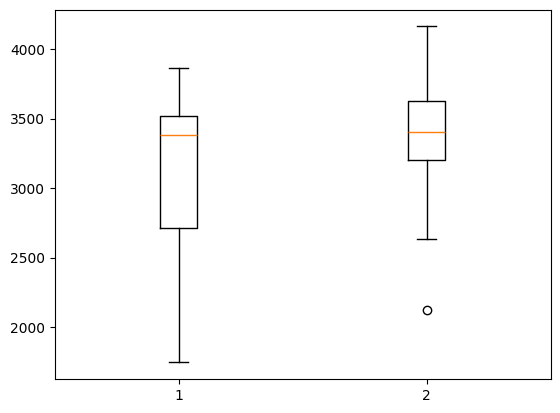

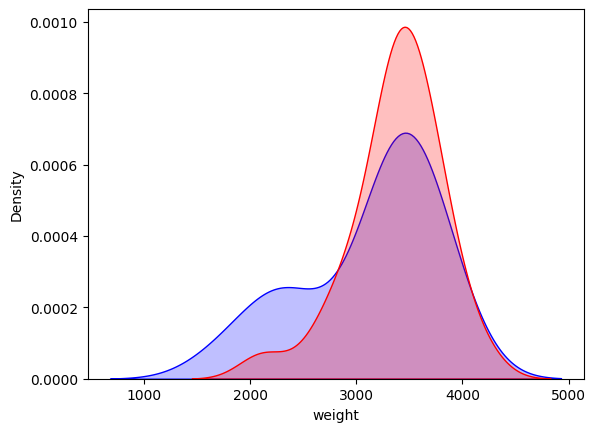

Non-parametric test result
KruskalResult(statistic=np.float64(0.889093995408741), pvalue=np.float64(0.3457229446672261))
KstestResult(statistic=np.float64(0.23931623931623933), pvalue=np.float64(0.4879659341168404), statistic_location=np.int64(2576), statistic_sign=np.int8(1))
t = -1.5228564442562815
p = 0.1352891891054555


In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('babyweight.csv')
girl = data[data['gender'] == 1]['weight']
boy = data[data['gender'] == 2]['weight']

pv_of_group1 = stats.shapiro(boy)[1]
pv_of_group2 = stats.shapiro(girl)[1]

print('정규성: ', pv_of_group1,pv_of_group2)    

print(stats.levene(group1,group2)) #  Levene’s Test란? 두 그룹의 **분산이 같은지(등분산인지)**를 확인하는 검정입니다.

plot_data = [girl, boy]
plt.boxplot(plot_data)
plt.show()

sns.kdeplot(data=girl,color='blue',fill=True)
sns.kdeplot(data=boy,color='red',fill=True)
plt.show()

## ===============
## t 값과 p값 구하기 양방향 검증
if pv_of_group1 > 0.05 and pv_of_group2 > 0.05:
     print("2 samples are satisfied for normality as girl: %3.2f, boy: %3.2f"\
           %(pv_of_group1,pv_of_group2)) # f string 방식
     pv_of_var = stats.levene(girl, boy)[1] 
     if pv_of_var > 0.05:
           t,p = stats.ttest_ind(girl, boy, alternative='two-sided') # 양측검정
           print("t = " + str(t))
           print("p = " + str(p))

else:
     print("Non-parametric test result")
     print(stats.kruskal(girl, boy))
     print(stats.ks_2samp(girl, boy))

t,p = stats.ttest_ind(girl, boy, alternative='two-sided') # 양측검정
print("t = " + str(t))
print("p = " + str(p))


---

### 쌍체검정

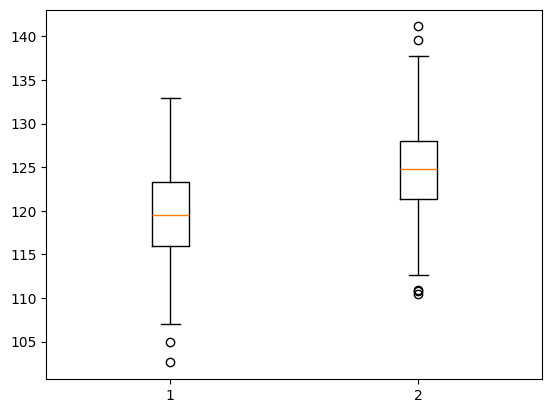

2 samples are satisfied for normality as group1: 0.29, group2: 0.44
t =  -17.628121642627114
p =  2.0030565070514158e-54
TtestResult(statistic=np.float64(-17.628121642627114), pvalue=np.float64(2.0030565070514158e-54), df=np.int64(499))


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats as stats

no_samples1 = 500
no_samples2 = 500

group1 = stats.norm(120,5).rvs(no_samples1)
group2 = stats.norm(125,5).rvs(no_samples2)


plot_data = [group1, group2]
plt.boxplot(plot_data)
plt.show()


pv_of_group1 = stats.shapiro(group1)[1]
pv_of_group2 = stats.shapiro(group2)[1]

if pv_of_group1 > 0.05 and pv_of_group2 > 0.05:
     print("2 samples are satisfied for normality as group1: %3.2f, group2: %3.2f"\
           %(pv_of_group1,pv_of_group2))
     pv_of_var = stats.levene(group1,group2)[1]
     if pv_of_var > 0.05:
           result = stats.ttest_rel(group1,group2, alternative='two-sided') # 쌍체검정: 어떤 변화가 있었는지 보는 것 왼쪽검정: less, 오른쪽검정: great
           print("t = ", result[0])
           print("p = ", result[1])

else:
     print("Non-parametric test result")
     print(stats.kruskal(group1, group2))
     print(stats.ks_2samp(group1, group2))

result = stats.ttest_rel(group1,group2, alternative='two-sided')
print(result)
     

## anorexia.csv 파일 받아서 검정

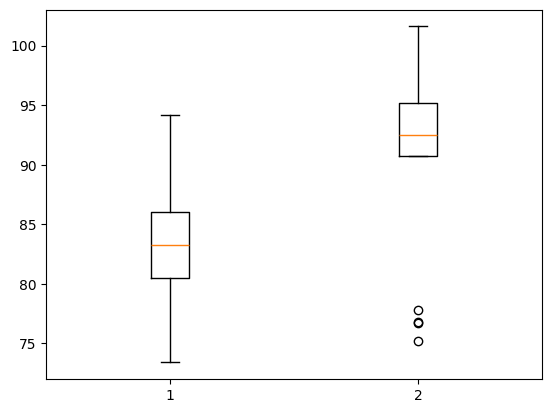

0.9972152751374112 0.007390658102599353
Non-parametric test result
KruskalResult(statistic=np.float64(6.943918092909543), pvalue=np.float64(0.008410468952901526))
KstestResult(statistic=np.float64(0.7058823529411765), pvalue=np.float64(0.0002384772526017693), statistic_location=np.float64(89.9), statistic_sign=np.int8(1))
TtestResult(statistic=np.float64(-4.184908135290033), pvalue=np.float64(0.0007002531056005393), df=np.int64(16))


In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import scipy.stats as stats
# 실험전후로 관계있으니까 종속이고 쌍체검정을 함
data = pd.read_csv('anorexia.csv')

group1 = data['Prior']
group2 = data['Post']


plot_data = [group1, group2]
plt.boxplot(plot_data)
plt.show()

pv_of_group1 = stats.shapiro(group1)[1]
pv_of_group2 = stats.shapiro(group2)[1]

print(pv_of_group1, pv_of_group2) 

if pv_of_group1 > 0.05 and pv_of_group2 > 0.05:
     print("2 samples are satisfied for normality as group1: %3.2f, group2: %3.2f"\
           %(pv_of_group1,pv_of_group2))
     pv_of_var = stats.levene(group1,group2)[1]
     if pv_of_var > 0.05:
           result = stats.ttest_rel(group1,group2, alternative='two-sided') # 쌍체검정: 어떤 변화가 있었는지 보는 것 왼쪽검정: less, 오른쪽검정: great
           print("t = ", result[0])
           print("p = ", result[1])

else:
     print("Non-parametric test result")
     print(stats.kruskal(group1, group2))
     print(stats.ks_2samp(group1, group2))


## t, p 값 구하기
result = stats.ttest_rel(group1,group2, alternative='two-sided')
print(result)
